In [ ]:
import gensim
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install plotly
!pip install --upgrade nbformat
!pip install nltk
!pip install spacy # spaCy is an open-source software library for advanced natural language processing
!pip install WordCloud
!pip install gensim # Gensim is an open-source library for unsupervised topic modeling and natural language processing
!pip install jupyterthemes
import nltk
nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.7 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df_true = pd.read_csv('/content/True.csv')
df_fake = pd.read_csv('/content/Fake.csv')

In [ ]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
df_true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [ ]:
df_fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [ ]:
df_true.isnull().sum()

,0
title,0
text,0
subject,0
date,0


In [ ]:
df_fake.isnull().sum()


,0
title,0
text,0
subject,0
date,0


# Data Pre-processing

In [ ]:
df_true["isFake"] = 0
df_fake["isFake"] = 1

In [ ]:
df_true.head()

,title,text,subject,date,isFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
df_fake.head()

,title,text,subject,date,isFake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [ ]:
df = pd.concat([df_true, df_fake])

In [ ]:
df.head()

,title,text,subject,date,isFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
df.tail()

,title,text,subject,date,isFake
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


In [ ]:
#Drop unnecessary columns
df = df.drop(columns=['date'])
df.head()

,title,text,subject,isFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0


In [ ]:
df['Original'] = df['title'] + " " + df["text"]
df.head()

,title,text,subject,isFake,Original
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,Trump wants Postal Service to charge 'much mor...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Why Use Stopwords?
In text analysis, we often want to ignore common stopwords during processing because they don't add much useful information about the content of the text. For example, when analyzing the text:

"The quick brown fox jumps over the lazy dog."
The words "the", "over", and "the" are stopwords, which are commonly used in most texts but don't help in understanding the core meaning. By removing these stopwords, we can focus on the important words: "quick", "brown", "fox", "jumps", "lazy", "dog".

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Delete stopwords and useless words
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result

# Apply the function to the dataframe
df['clean'] = df['Original'].apply(preprocess)

In [ ]:
df.head()

,title,text,subject,isFake,Original,clean,clean_joined
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc...",budget fight looms republicans flip fiscal scr...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond...",military accept transgender recruits monday pe...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing...",senior republican senator mueller washington r...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ...",russia probe helped australian diplomat washin...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, amazon...",trump wants postal service charge amazon shipm...


In [ ]:
# Obtain the total words present in the dataset
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

list_of_words[0:30]

['budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp']

In [ ]:
# join the words into a string (words seperated by " ")
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))
df.head()

,title,text,subject,isFake,Original,clean,clean_joined
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc...",budget fight looms republicans flip fiscal scr...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond...",military accept transgender recruits monday pe...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing...",senior republican senator mueller washington r...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ...",russia probe helped australian diplomat washin...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, amazon...",trump wants postal service charge amazon shipm...


<Axes: xlabel='isFake', ylabel='count'>

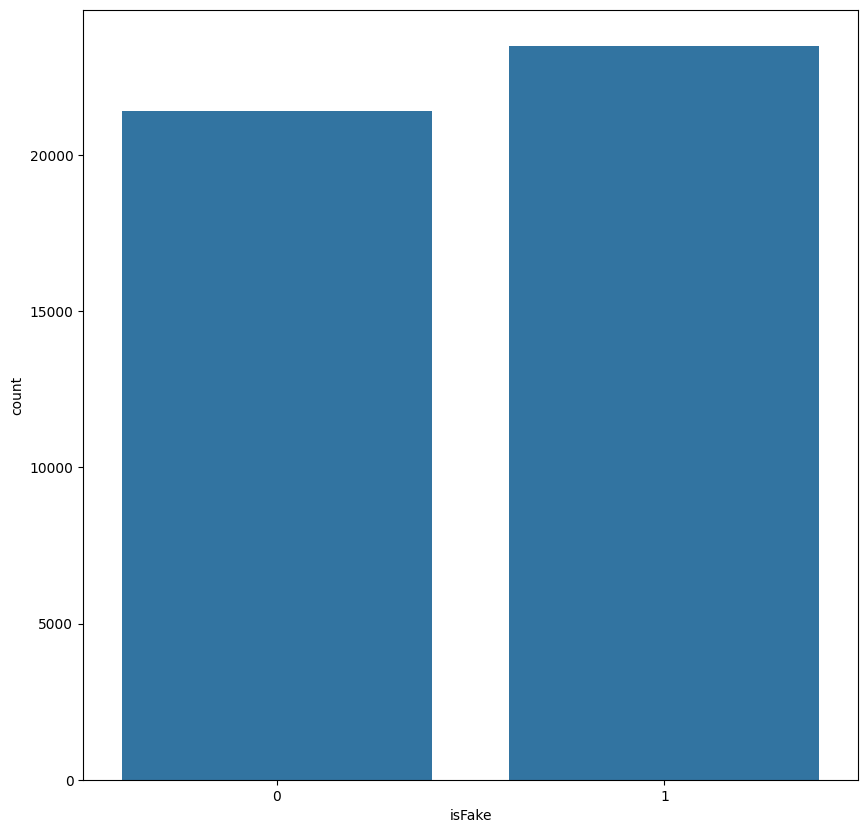

In [ ]:
# plot the number of samples in 'isfake'
plt.figure(figsize = (10, 10))
sns.countplot(x = "isFake", data = df)

# Prepare data for training

In [ ]:
# split data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.isFake, test_size = 0.2)


In [ ]:
from nltk import word_tokenize

total_words = len(list(set(list_of_words)))
total_words

108705

In [ ]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)
print(train_sequences[0:][0])

[899, 1275, 2535, 6189, 749, 438, 13968, 1, 165, 11256, 926, 7689, 3, 10228, 170, 162, 11600, 10321, 687, 699, 899, 1275, 4823, 2437, 12879, 28, 15, 8, 6463, 162, 3968, 2449, 1275, 1266, 374, 21, 586, 21, 908, 346, 374, 21, 53, 4823, 6318, 9908, 10322, 43, 1275, 4823, 520, 1010, 1185, 3, 1, 403, 99, 15, 8, 11938, 1376, 3969, 1275, 2, 5298, 6588, 3969, 4823, 520, 1010, 1185, 3, 306, 21, 3831, 284, 4823, 908, 78, 4562, 899, 1275, 193, 3234, 21, 443, 403, 3710, 3512, 5298, 403, 43304, 4823, 735, 3710, 3512, 5298, 403, 43304, 306, 65365, 4823, 4823, 284, 4823, 471, 213, 3217, 2787, 197, 815, 422, 204, 3388, 1597, 7552, 3851, 176, 1096, 65366, 65367, 284, 899, 1275, 9207, 117, 5456, 1280, 19570, 787, 1127, 886, 11601, 49758, 49758, 284, 2772, 4588, 7413, 176, 9267, 65368, 284, 5298, 403, 893, 429, 2247, 4040, 1509, 65369, 284, 2847, 3512, 471, 3917, 3831, 421, 596, 550, 112, 292, 2363, 65370, 284, 22469, 38384, 65371, 284, 37, 4808, 18, 1275, 500, 2323, 1646, 65372, 284, 2957, 160, 444, 383


###Tokenizer:
  Converts text data into sequences of integers, where each integer represents a specific word or token.
###num_words=total_words:###
 Limits the tokenizer to consider only the total_words (108,704) most common words in the dataset. This helps reduce the size of the vocabulary and focuses on the most relevant words, which is especially useful when working with large datasets.

 ### fit_on_texts(x_train):
  The tokenizer is trained on the text data in x_train. It analyzes the text, identifies unique words, and assigns each word a unique integer ID based on its frequency.
###OutputAfter fitting:
the tokenizer has a dictionary (vocabulary) mapping words to integer indices.

### texts_to_sequences:
Converts each sentence (text) in the dataset into a sequence of integers. Each word in the sentence is replaced by its corresponding integer index from the tokenizer's vocabulary.

###The print statment represnts the sequence of first row of xlean_joined column

In [ ]:
len(train_sequences)

35918

In [ ]:
len(test_sequences)

8980

In [ ]:
print("The encoding for document\n",df.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 0    budget fight looms republicans flip fiscal scr...
0    donald trump sends embarrassing year message d...
Name: clean_joined, dtype: object 
 is :  [899, 1275, 2535, 6189, 749, 438, 13968, 1, 165, 11256, 926, 7689, 3, 10228, 170, 162, 11600, 10321, 687, 699, 899, 1275, 4823, 2437, 12879, 28, 15, 8, 6463, 162, 3968, 2449, 1275, 1266, 374, 21, 586, 21, 908, 346, 374, 21, 53, 4823, 6318, 9908, 10322, 43, 1275, 4823, 520, 1010, 1185, 3, 1, 403, 99, 15, 8, 11938, 1376, 3969, 1275, 2, 5298, 6588, 3969, 4823, 520, 1010, 1185, 3, 306, 21, 3831, 284, 4823, 908, 78, 4562, 899, 1275, 193, 3234, 21, 443, 403, 3710, 3512, 5298, 403, 43304, 4823, 735, 3710, 3512, 5298, 403, 43304, 306, 65365, 4823, 4823, 284, 4823, 471, 213, 3217, 2787, 197, 815, 422, 204, 3388, 1597, 7552, 3851, 176, 1096, 65366, 65367, 284, 899, 1275, 9207, 117, 5456, 1280, 19570, 787, 1127, 886, 11601, 49758, 49758, 284, 2772, 4588, 7413, 176, 9267, 65368, 284, 5298, 403, 893, 429, 2247, 4040, 1509,

Word "budget" → 1
Word "fight" → 4086
Word "looms" → 125
, and so on...

In [ ]:
# pad_sequences to ensure all input sequences have the same length, which is required for neural networks.
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post')
print(padded_test[0:100])

[[    0     0     0 ...   909   361    29]
 [  998  4539   639 ...  8525 14775  1541]
 [   47   781 11380 ...  2100    75    47]
 ...
 [  864   600   334 ...  2076   588    15]
 [    0     0   274 ...  1783  1490     2]
 [ 3705   646   137 ...   707  9130  2278]]


# First Algorithm using (Bidirectional LSTM)

In [ ]:
model = Sequential()

model.add(Embedding(total_words, output_dim = 128))

model.add(Bidirectional(LSTM(128)))

model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
total_words

108705

In [ ]:
y_train = np.asarray(y_train)

In [ ]:
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

Epoch 1/2
506/506 ━━━━━━━━━━━━━━━━━━━━ 115s 218ms/step - acc: 0.9450 - loss: 0.1126 - val_acc: 0.9969 - val_loss: 0.0107
Epoch 2/2
506/506 ━━━━━━━━━━━━━━━━━━━━ 144s 222ms/step - acc: 0.9998 - loss: 0.0010 - val_acc: 0.9975 - val_loss: 0.0140


In [ ]:
pred = model.predict(padded_test)

281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step


In [ ]:
print(pred[0:100])

[[7.0893975e-09]
 [3.6265357e-09]
 [1.3863001e-09]
 [9.6548426e-01]
 [2.3375019e-08]
 [3.1149956e-09]
 [1.1283769e-07]
 [9.9997056e-01]
 [1.6659165e-09]
 [1.3945690e-09]
 [1.7774116e-07]
 [9.9995077e-01]
 [4.0431946e-08]
 [5.0085028e-08]
 [1.4160665e-08]
 [1.0419098e-08]
 [9.9997926e-01]
 [9.9991077e-01]
 [9.9995196e-01]
 [1.1578376e-09]
 [1.7470647e-09]
 [9.9993569e-01]
 [1.9759401e-10]
 [6.2942656e-09]
 [2.0297283e-07]
 [5.4843752e-10]
 [3.6198324e-09]
 [6.7147205e-08]
 [9.7025213e-07]
 [9.9997467e-01]
 [9.6704888e-01]
 [9.9998164e-01]
 [1.6760477e-07]
 [6.6746569e-10]
 [9.9995852e-01]
 [1.2542321e-09]
 [9.9998808e-01]
 [9.9995673e-01]
 [9.9996829e-01]
 [9.9996608e-01]
 [9.9988520e-01]
 [9.9994063e-01]
 [2.3850465e-08]
 [9.9996883e-01]
 [1.9173263e-09]
 [3.1240499e-10]
 [1.6062856e-08]
 [9.9995029e-01]
 [9.9977851e-01]
 [9.9620712e-01]
 [5.7022550e-08]
 [3.9148518e-10]
 [3.0099850e-10]
 [4.3073553e-10]
 [9.9992251e-01]
 [9.9846357e-01]
 [9.9981648e-01]
 [5.6317759e-07]
 [3.1239527e-0

In [ ]:
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.9959910913140312


<Axes: >

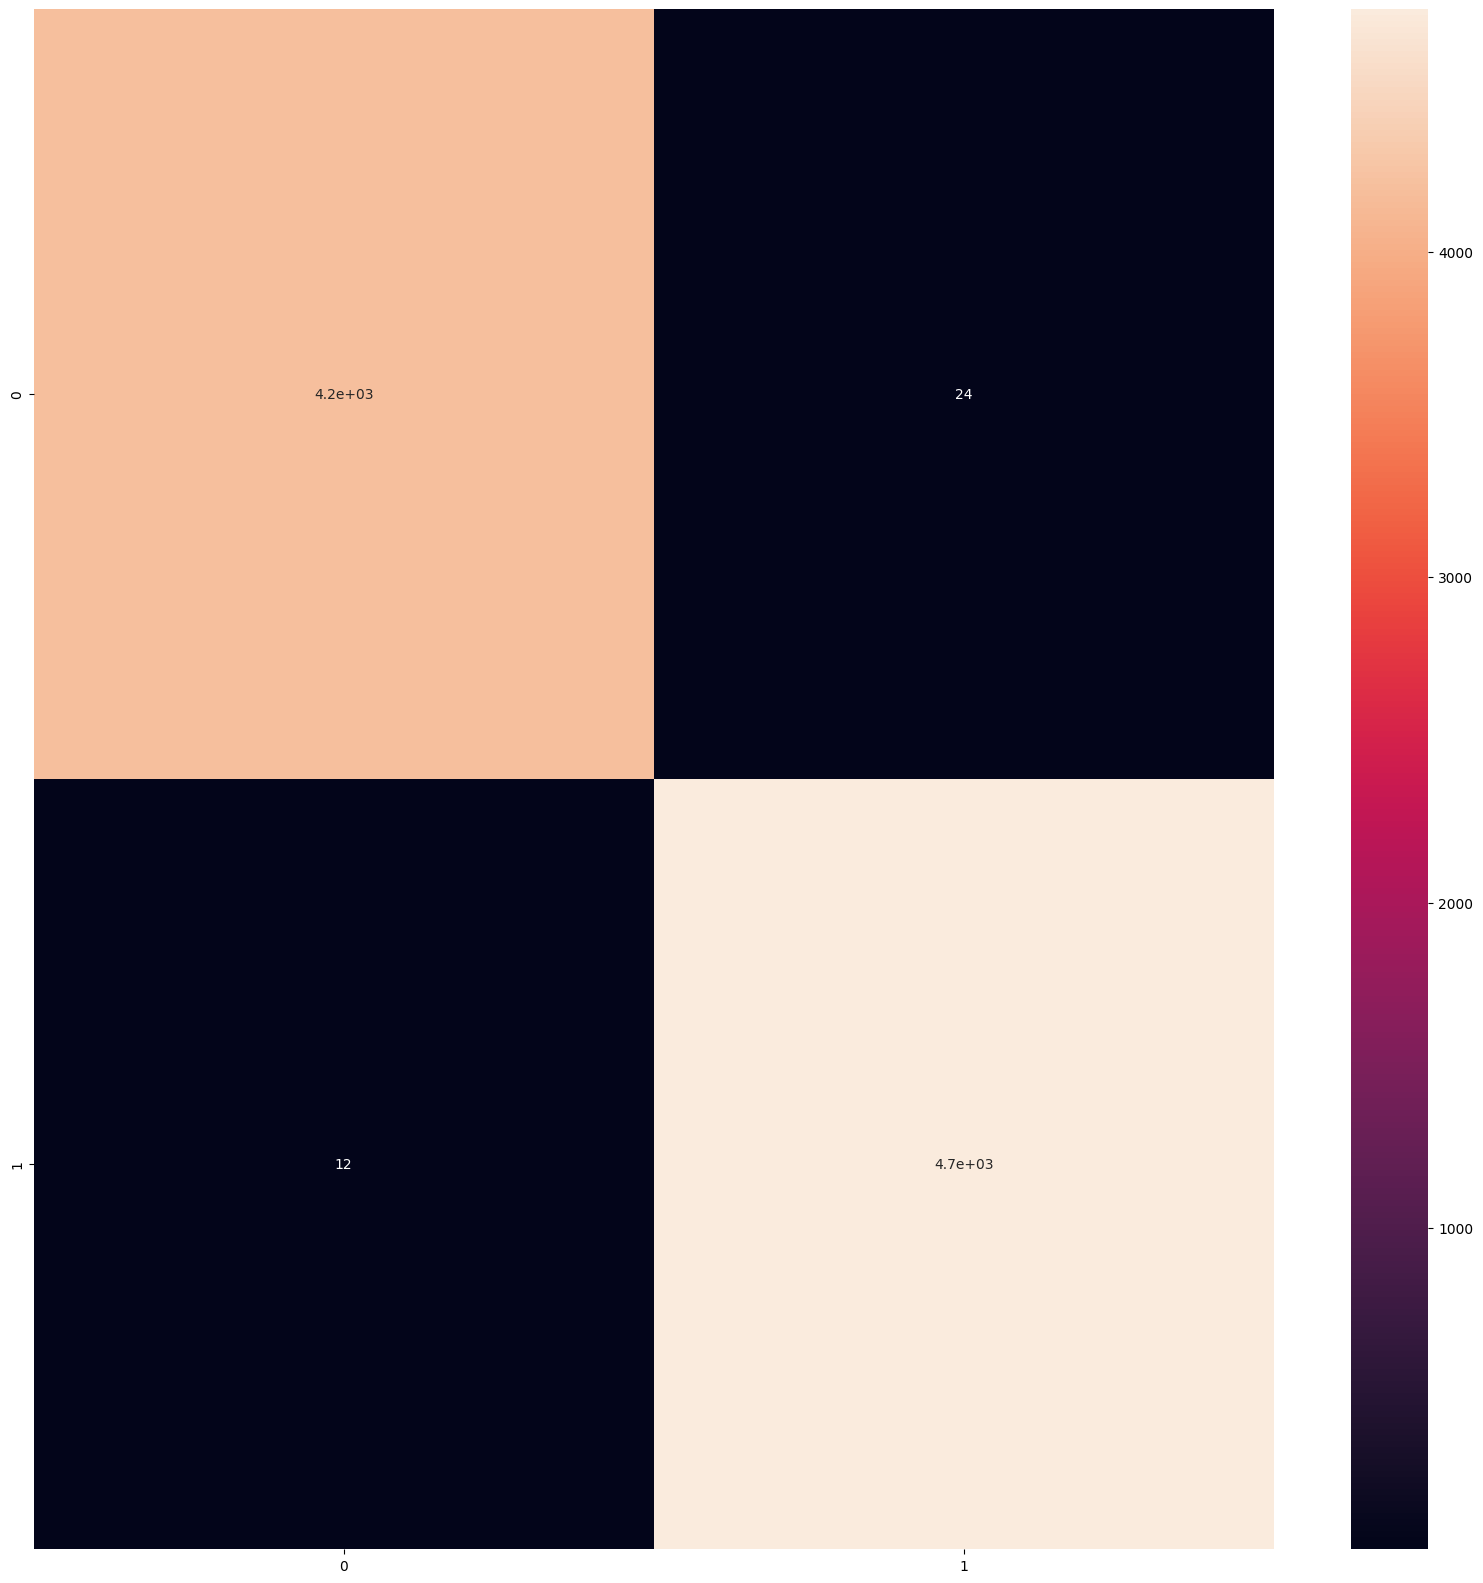

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (20, 20))
sns.heatmap(cm, annot = True)

In [ ]:
new_text = "budget fight looms republicans flip fiscal scr"

new_sequence = tokenizer.texts_to_sequences([new_text])

padded_sequence = pad_sequences(new_sequence, maxlen=40, padding='post', truncating='post')

prediction = model.predict(padded_sequence)

print("Prediction:", prediction[0][0])

if prediction[0][0] > 0.5:
    print("The news is likely FAKE.")
else:
    print("The news is likely REAL.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction: 0.99528414
The news is likely FAKE.


# Second algorithm (CNN)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.isFake, test_size = 0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((35918,), (8980,), (35918,), (8980,))

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.utils import to_categorical


x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

x_train_pad = pad_sequences(x_train_seq, maxlen=40, padding='post', truncating='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=40, padding='post', truncating='post')

cnn_model = Sequential([
    Embedding(input_dim=total_words, output_dim=128, input_length=40),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model.fit(
    x_train_pad,
    y_train,
    batch_size=64,
    validation_split=0.1,
    epochs=3,
)

Epoch 1/3
506/506 ━━━━━━━━━━━━━━━━━━━━ 63s 121ms/step - acc: 0.9577 - loss: 0.1430 - val_acc: 0.9986 - val_loss: 0.0100
Epoch 2/3
506/506 ━━━━━━━━━━━━━━━━━━━━ 61s 120ms/step - acc: 0.9994 - loss: 0.0017 - val_acc: 0.9978 - val_loss: 0.0097
Epoch 3/3
506/506 ━━━━━━━━━━━━━━━━━━━━ 63s 125ms/step - acc: 1.0000 - loss: 1.3053e-04 - val_acc: 0.9983 - val_loss: 0.0099


In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(x_test_pad, y_test, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9985 - loss: 0.0069
Test Loss: 0.0083
Test Accuracy: 0.9982


In [ ]:
# Make predictions on the test dataset
predictions = cnn_model.predict(padded_test)

predicted_labels = (predictions > 0.5).astype(int)

print(predicted_labels[:10])

281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]


# Third algorithm (RNN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout


model = Sequential([
    Embedding(input_dim=total_words, output_dim=50, input_length=40),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    x_train_pad,
    y_train,
    batch_size=64,
    validation_split=0.1,
    epochs=3,
)


Epoch 1/3
506/506 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.9258 - loss: 0.1666 - val_accuracy: 0.9978 - val_loss: 0.0128
Epoch 2/3
506/506 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.9981 - loss: 0.0081 - val_accuracy: 0.9744 - val_loss: 0.1139
Epoch 3/3
506/506 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9896 - loss: 0.0396 - val_accuracy: 0.9967 - val_loss: 0.0178


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_pad, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9955 - loss: 0.0132
Test Accuracy: 0.9959


# Applying LSTM on "train.csv", and "test.csv"

In [ ]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

In [ ]:
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df_train.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [ ]:
columns_to_check = ['title', 'author', 'text']
df_train = df_train.dropna(subset=columns_to_check)
df_test = df_test.dropna(subset=columns_to_check)

In [ ]:
df_train.isnull().sum()

,0
id,0
title,0
author,0
text,0
label,0


In [ ]:
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result

# Apply the function to the dataframe
df_train['clean'] = df_train['text'].apply(preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# join the words into a string (words seperated by " ")
df_train['clean_joined'] = df_train['clean'].apply(lambda x: " ".join(x))
df_train.head()

,id,title,author,text,label,clean,clean_joined
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,"[house, aide, comey, letter, jason, chaffetz, ...",house aide comey letter jason chaffetz tweeted...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"[feeling, life, circles, roundabout, heads, st...",feeling life circles roundabout heads straight...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,"[truth, fired, october, tension, intelligence,...",truth fired october tension intelligence analy...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,"[videos, civilians, killed, single, airstrike,...",videos civilians killed single airstrike ident...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,"[print, iranian, woman, sentenced, years, pris...",print iranian woman sentenced years prison ira...


In [ ]:
# split data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train.clean_joined, df_train.label, test_size = 0.2)

In [ ]:
from nltk import word_tokenize

list_of_words = []
for i in df_train.clean:
    for j in i:
        list_of_words.append(j)

total_words = len(list(set(list_of_words)))
total_words

149279

In [ ]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)
print(train_sequences[0:][0])


[279, 1599, 9708, 522, 2092, 249, 1095, 407, 1890, 6020, 37, 5807, 102, 1357, 279, 1578, 3892, 4, 100, 4668, 9198, 37, 102, 977, 2743, 4216, 5099, 2092, 1890, 966, 4216, 2092, 1032, 1578, 3892, 4, 9198, 645, 3613, 5099, 1890, 1825, 3892, 21, 2007, 77469, 77470, 189, 372, 21, 1578, 372, 763, 3892, 1504, 3371, 20, 9522, 63, 218, 8187, 1792, 44745, 4077, 30, 5807, 49, 15, 13064, 189, 1352, 49, 15, 14554, 189, 1838, 9198, 72, 100, 4668, 868, 3514, 1890, 369, 279, 4517, 1477, 1666, 830, 127, 5099, 1890, 2092, 1032, 1599, 1477, 1890, 6020, 891, 6681, 279, 1357, 4397, 3813, 1250, 574, 110, 43, 3931, 1923, 4518, 5099, 249, 4055, 42, 100, 4668, 1666, 245, 1175, 127, 5099, 1890, 115, 12217, 59882, 1792, 417, 77471, 824, 6020, 931, 391, 9199, 653, 9522, 2133, 3813, 1702, 1971, 5873, 4, 7447, 40487, 77472, 452, 5873, 1599, 6403, 452, 96, 6112, 127, 5099, 1890, 1972, 2164, 70, 8187, 1040, 44745, 4077, 670, 1666, 1474, 12218, 2095, 3892, 100, 4668, 407, 452, 3831, 70, 8774, 2179, 5099, 1890, 1437, 1

In [ ]:
# pad_sequences to ensure all input sequences have the same length, which is required for neural networks.
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post')
print(padded_test[0:100])


[[ 1550  2494     9 ...   941  3489   155]
 [ 1123  1024   248 ...   979   160   678]
 [   62    78    11 ...  1090  1492 19242]
 ...
 [41285   844   216 ...   209 14287   282]
 [  969  3585   592 ...  2076  6810 17774]
 [ 2380 25521   139 ...   178  2590    23]]


In [ ]:
model = Sequential()

model.add(Embedding(total_words, output_dim = 128))

model.add(Bidirectional(LSTM(128)))

model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
y_train = np.asarray(y_train)

In [ ]:
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

Epoch 1/2
206/206 ━━━━━━━━━━━━━━━━━━━━ 98s 452ms/step - acc: 0.7932 - loss: 0.4115 - val_acc: 0.9275 - val_loss: 0.2000
Epoch 2/2
206/206 ━━━━━━━━━━━━━━━━━━━━ 91s 443ms/step - acc: 0.9800 - loss: 0.0578 - val_acc: 0.9152 - val_loss: 0.2719


# preprocess test set

In [ ]:
pred = model.predict(padded_test)

143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step


In [ ]:
unseen_data = df_test['text'].fillna("").astype(str).values

random_indices = np.random.choice(len(unseen_data), 2, replace=False)
selected_texts = unseen_data[random_indices]

unseen_sequences = tokenizer.texts_to_sequences(selected_texts)
unseen_padded = pad_sequences(unseen_sequences, maxlen=40, padding='post', truncating='post')

predictions = model.predict(unseen_padded)

print("Raw predictions:", predictions)

threshold = 0.5
binary_predictions = [1 if pred > threshold else 0 for pred in predictions]

for text, raw_pred, prediction in zip(selected_texts, predictions, binary_predictions):
    print(f"Text: {text}")
    print(f"Raw Prediction: {raw_pred[0]:.4f}")
    print(f"Prediction (Binary): {'1' if prediction == 1 else '0'}")
    print("-" * 40)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Raw predictions: [[0.00749575]
 [0.94914967]]
Text: Five former faculty members at Phillips Academy in Andover, Mass. including a   writer, engaged in sexual misconduct with students in the 1970s and ’80s, the head of the school reported on Tuesday. It is the latest in a string of such revelations involving elite prep schools. Three of the faculty members were identified through an investigation this year, after the school asked former students who had been abused to step forward, the head of school, John Palfrey, wrote in a message to alumni, staff, students and parents. In addition, Mr. Palfrey disclosed that there were “a small number of cases, each dating from the 1980s, in which Phillips Andover previously learned of sexual misconduct or boundary violations by faculty members. ” “In each of these cases, we have notified the relevant state officials,” he wrote, but the cases appear unlikely to result in prosecution. At least one of the former t